In [51]:
#! pip install pandas numpy matplotlib yfinance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

warnings.filterwarnings('ignore')

In [4]:
symbol = 'BTC-USD'
data = yf.download(symbol, start='2016-01-01', end='2024-05-15', interval='1d')
data = data[['Adj Close']]
data.rename(columns={'Adj Close': 'price_usd'}, inplace=True)

[*********************100%***********************]  1 of 1 completed


In [5]:
short_window = 50
long_window = 200

data['SMA50'] = data['price_usd'].rolling(window=short_window, min_periods=1).mean()
data['SMA200'] = data['price_usd'].rolling(window=long_window, min_periods=1).mean()

In [7]:
data['Signal'] = 0
#data['Signal'][short_window:] = np.where(data['SMA50'][short_window:] > data['SMA200'][short_window:], 1, 0)
data['Signal'][short_window:] =  np.where(data['price_usd'][short_window:] > data['SMA50'][short_window:], 1, 0)
data['Position'] = data['Signal'].diff()

#print(data)

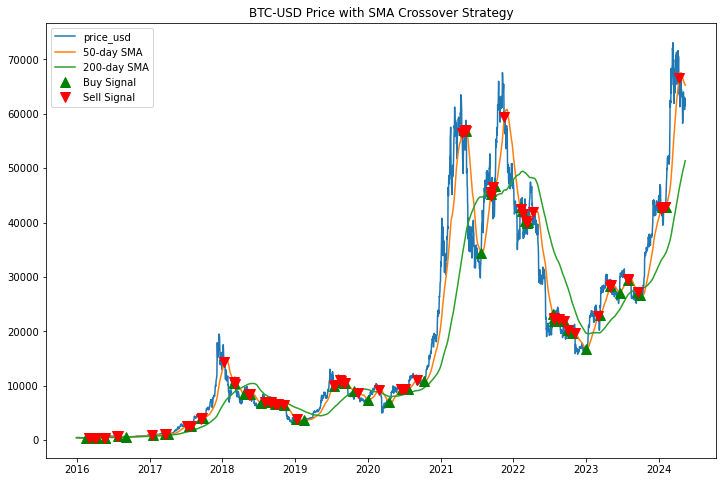

In [8]:
# Initial capital
initial_capital = 100000.0

# Create a DataFrame to store the positions
positions = pd.DataFrame(index=data.index).fillna(0)
positions[symbol] = 100 * data['Signal']  # This example assumes you buy 100 shares

# Calculate the daily portfolio value
portfolio = positions.multiply(data['price_usd'], axis=0)

# Store the cash in the portfolio
pos_diff = positions.diff()
portfolio['cash'] = initial_capital - (pos_diff.multiply(data['price_usd'], axis=0)).sum(axis=1).cumsum()

# Total portfolio value
portfolio['total'] = portfolio[symbol] + portfolio['cash']

# Calculate the portfolio returns
portfolio['returns'] = portfolio['total'].pct_change()

# Plot the strategy
plt.figure(figsize=(12, 8))
plt.plot(data['price_usd'], label='price_usd')
plt.plot(data['SMA50'], label='50-day SMA')
plt.plot(data['SMA200'], label='200-day SMA')

# Buy signals
plt.plot(data[data['Position'] == 1].index, 
         data['SMA50'][data['Position'] == 1], 
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Sell signals
plt.plot(data[data['Position'] == -1].index, 
         data['SMA50'][data['Position'] == -1], 
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title(f'{symbol} Price with SMA Crossover Strategy')
plt.legend(loc='best')
plt.show()


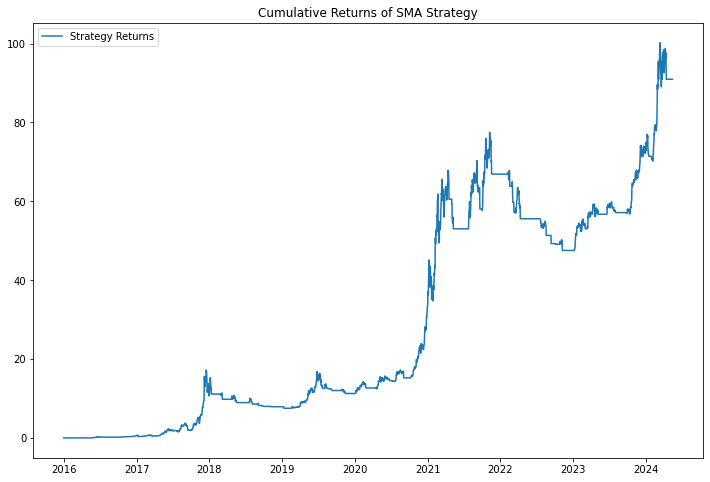

Final Portfolio Value: $9197537.80
Total Return: 9097.54%


In [9]:
# Calculate cumulative returns
cumulative_returns = (1 + portfolio['returns']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 8))
plt.plot(cumulative_returns, label='Strategy Returns')
plt.title('Cumulative Returns of SMA Strategy')
plt.legend(loc='best')
plt.show()

# Print final portfolio value
final_value = portfolio['total'].iloc[-1]
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Total Return: {(final_value - initial_capital) / initial_capital:.2%}")



In [10]:
#### Bucle por los distintos valores de SMA para ver el que mejor rendimientos da

# Initial capital
initial_capital = 100000.0

symbol = 'BTC-USD'
data = yf.download(symbol, start='2016-01-01', end='2024-05-15', interval='1d')
data = data[['Adj Close']]
data.rename(columns={'Adj Close': 'price_usd'}, inplace=True)

print(data)

for sma in range (10, 400, 10):

    data['SMA'] = data['price_usd'].rolling(window=sma, min_periods=1).mean()

    data['Signal'] = 0
    #data['Signal'][short_window:] = np.where(data['SMA50'][short_window:] > data['SMA200'][short_window:], 1, 0)
    data['Signal'][sma:] =  np.where(data['price_usd'][sma:] > data['SMA'][sma:], 1, 0)
    data['Position'] = data['Signal'].diff()

    # Create a DataFrame to store the positions
    positions = pd.DataFrame(index=data.index).fillna(0)
    positions[symbol] = 100 * data['Signal']  # This example assumes you buy 100 shares

    # Calculate the daily portfolio value
    portfolio = positions.multiply(data['price_usd'], axis=0)

    # Store the cash in the portfolio
    pos_diff = positions.diff()
    portfolio['cash'] = initial_capital - (pos_diff.multiply(data['price_usd'], axis=0)).sum(axis=1).cumsum()

    # Total portfolio value
    portfolio['total'] = portfolio[symbol] + portfolio['cash']

    # Calculate the portfolio returns
    portfolio['returns'] = portfolio['total'].pct_change()

    # Calculate cumulative returns
    cumulative_returns = (1 + portfolio['returns']).cumprod() - 1

    # Print final portfolio value
    final_value = portfolio['total'].iloc[-1]
    print(f"########")
    print(f"SMA" + str(sma))
    print(f"Final Portfolio Value: ${final_value:.2f}")
    print(f"Total Return: {(final_value - initial_capital) / initial_capital:.2%}")
    print("")

print(f"The best 40, 50 and 110 SMA")

[*********************100%***********************]  1 of 1 completed
               price_usd
Date                    
2015-12-31    430.566986
2016-01-01    434.334015
2016-01-02    433.437988
2016-01-03    430.010986
2016-01-04    433.091003
...                  ...
2024-05-10  60792.777344
2024-05-11  60793.710938
2024-05-12  61448.394531
2024-05-13  62901.449219
2024-05-14  61552.789062

[3058 rows x 1 columns]
########
SMA10
Final Portfolio Value: $5965245.57
Total Return: 5865.25%

########
SMA20
Final Portfolio Value: $4123652.12
Total Return: 4023.65%

########
SMA30
Final Portfolio Value: $6004204.26
Total Return: 5904.20%

########
SMA40
Final Portfolio Value: $10259382.91
Total Return: 10159.38%

########
SMA50
Final Portfolio Value: $9197537.80
Total Return: 9097.54%

########
SMA60
Final Portfolio Value: $8302965.84
Total Return: 8202.97%

########
SMA70
Final Portfolio Value: $7277501.14
Total Return: 7177.50%

########
SMA80
Final Portfolio Value: $7425116.52
Total Retur